# Project : Diabetes Patients

# Reading Files into Python

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
#importing data
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Variable Identification

In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Integer Data Type

In [8]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

Pregnancies      int64
Glucose          int64
BloodPressure    int64
SkinThickness    int64
Insulin          int64
Age              int64
Outcome          int64
dtype: object

Summary:

Glucose value shoud be change to float number as decimal numbers are accceptable level for Glucose.

SkinThickness also should convert to float.

Age numbers are okay to indicate as integers.

outcome : 1 represents having diabetes and 0 represents not having. However, there is no comparison between these two categories. This needs to be converted to category datatype.

In [9]:
# converting outcome to category
data['Outcome'] = data['Outcome'].astype('category')
data['SkinThickness'] = data['SkinThickness'].astype('float')
data['Glucose'] = data['Glucose'].astype('float')
data.dtypes[data.dtypes == 'int64']

Pregnancies      int64
BloodPressure    int64
Insulin          int64
Age              int64
dtype: object

# Float Data Type¶

In [10]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

Glucose                     float64
SkinThickness               float64
BMI                         float64
DiabetesPedigreeFunction    float64
dtype: object

Summary:

All variables like Glucose , SkinThickness  , BMI and DiabetesPedigreeFunction are best represented by the float variables. 

In [11]:
data.dtypes

Pregnancies                    int64
Glucose                      float64
BloodPressure                  int64
SkinThickness                float64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

In [12]:
#There is no null values in data set
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,0,33.6,0.627,50,1
1,1,85.0,66,29.0,0,26.6,0.351,31,0
2,8,183.0,64,0.0,0,23.3,0.672,32,1
3,1,89.0,66,23.0,94,28.1,0.167,21,0
4,0,137.0,40,35.0,168,43.1,2.288,33,1


In [14]:
(data[data.columns] == 0).sum()

#here the zero values for Glucose, bloodpreure , skinthickness, insulin, bmi are not possible so , fill with median value these items.

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,0,33.6,0.627,50,1
1,1,85.0,66,29.0,0,26.6,0.351,31,0
2,8,183.0,64,0.0,0,23.3,0.672,32,1
3,1,89.0,66,23.0,94,28.1,0.167,21,0
4,0,137.0,40,35.0,168,43.1,2.288,33,1


In [16]:
Zero_Columns=["Glucose","BMI","Insulin","BloodPressure","SkinThickness"]

In [17]:
medians = data[Zero_Columns].median()

In [18]:
for column in Zero_Columns:
    data[column] = data[column].replace(0, medians[column])

In [19]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1


In [20]:
#for i in ["Glucose","BMI","Insulin","BloodPressure"]:

mask = (data['BloodPressure'] == 0)

In [21]:
Zero_blood=data[mask]
Zero_blood

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [22]:
(data[data.columns] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [23]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101.0,76,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70,27.0,30.5,36.8,0.340,27,0
765,5,121.0,72,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60,23.0,30.5,30.1,0.349,47,1
767,1,93.0,70,31.0,30.5,30.4,0.315,23,0


In [24]:
class_counts = data.groupby('Outcome').size().reset_index(name='Count')

total_count = class_counts['Count'].sum()
class_counts['Percentage'] = (class_counts['Count'] / total_count) * 100



class_counts

,Outcome,Count,Percentage
0,0,500,65.104167
1,1,268,34.895833


Here  we cleaned the data from zeros that were not possible

# Data Exploration Analysis

In [502]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Outliers check

 Feature Engineering for Age feature to make easy to interprete results based on Age

In [55]:
data['AgeIntervals']=pd.cut(data['Age'], bins =5,labels=['Group1',
                                        'Group2',
                                         'Group3',
                                         'Group4',
                                         'Group5'
                                         ],
                                         include_lowest=True)

In [56]:
data['AgeIntervals']

0      Group3
1      Group1
2      Group1
3      Group1
4      Group1
        ...  
763    Group4
764    Group1
765    Group1
766    Group3
767    Group1
Name: AgeIntervals, Length: 768, dtype: category
Categories (5, object): ['Group1' < 'Group2' < 'Group3' < 'Group4' < 'Group5']

In [27]:
data.groupby('AgeIntervals').size().reset_index(name='Count')



,AgeIntervals,Count
0,Group1,474
1,Group2,176
2,Group3,76
3,Group4,39
4,Group5,3


In [39]:
group_0 = data[data['Outcome'] == 0]
group_1 = data[data['Outcome'] == 1]


mean_glucose_0 = group_0['Glucose'].mean()
mean_glucose_1 = group_1['Glucose'].mean()


print('Average of Glucose for outcome=0' ,mean_glucose_0)
print('Average of Glucose for outcome=1' ,mean_glucose_1)

Average of Glucose for outcome=0 110.682
Average of Glucose for outcome=1 142.13059701492537


In [40]:
group_0 = data[data['Outcome'] == 0]
group_1 = data[data['Outcome'] == 1]


mean_Bl_0 = group_0['BloodPressure'].mean()
mean_Bl_1 = group_1['BloodPressure'].mean()


print('Average of BloodPressure for outcome=0' ,mean_Bl_0)
print('Average of BloodPressure for outcome=1' ,mean_Bl_1)

Average of BloodPressure for outcome=0 70.92
Average of BloodPressure for outcome=1 75.1231343283582


In [41]:
group_0 = data[data['Outcome'] == 0]
group_1 = data[data['Outcome'] == 1]


mean_Insulin_0 = group_0['Insulin'].mean()
mean_Insulin_1 = group_1['Insulin'].mean()


print('Average of Insulin for outcome=0' ,mean_Insulin_0)
print('Average of Insulin for outcome=1' ,mean_Insulin_1)

Average of Insulin for outcome=0 83.188
Average of Insulin for outcome=1 116.0410447761194


In [45]:
group_0 = data[data['Outcome'] == 0]
group_1 = data[data['Outcome'] == 1]


mean_BMI_0 = group_0['BMI'].mean()
mean_BMI_1 = group_1['BMI'].mean()


print('Average of BMI for outcome=0:' ,mean_BMI_0)
print('Average of BMI for outcome=1:' ,mean_BMI_1)

Average of BMI for outcome=0 30.880200000000002
Average of BMI for outcome=1 35.38134328358209


In [51]:
group_0 = data[data['Outcome'] == 0]
group_1 = data[data['Outcome'] == 1]


mean_DPF_0 = group_0['DiabetesPedigreeFunction'].mean()
mean_DPF_1 = group_1['DiabetesPedigreeFunction'].mean()


print('Average of Diabetes Pedigree Function for outcome=0:' ,  mean_DPF_0)
print('Average of Diabetes Pedigree Function for outcome=1:' ,  mean_DPF_1)

Average of Diabetes Pedigree Function for outcome=0: 0.42973400000000006
Average of Diabetes Pedigree Function for outcome=1: 0.5505


In [52]:
group_0 = data[data['Outcome'] == 0]
group_1 = data[data['Outcome'] == 1]


mean_Age_0 = group_0['Age'].mean()
mean_Age_1 = group_1['Age'].mean()


print('Average of Diabetes Pedigree Function for outcome=0:' ,  mean_DPF_0)
print('Average of Diabetes Pedigree Function for outcome=1:' ,  mean_DPF_1)

Average of Age for outcome=0: 31.19
Average of Age for outcome=1: 37.06716417910448


In [53]:
Category_1= data[data['Outcome'] == 1].groupby('AgeIntervals').size().reset_index(name='Count')
Category_1



,AgeIntervals,Count
0,Group1,122
1,Group2,88
2,Group3,44
3,Group4,13
4,Group5,1


Observation:
 we see for Group3 more than 50% population have been reported as diabetes. So we may focus on this
 group for some strategies

# Outliers removal

In [419]:
lst=["Pregnancies","BMI","Insulin","BloodPressure","SkinThickness", "DiabetesPedigreeFunction", "Age", "Glucose"]

def outlier(low_cal, upper_cal):
    for i in lst:
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        low_cal = quant25-(1.5*IQR)
        upper_cal = quant75+(1.5*IQR) 
        data[i] = data[i].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
        

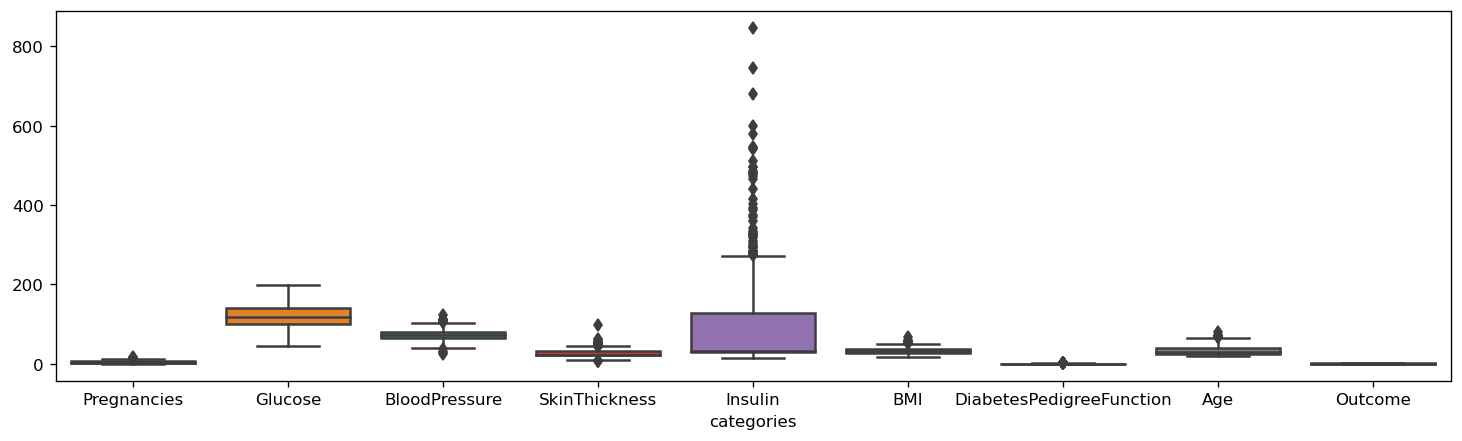

In [420]:
plt.figure(figsize=(15,4), dpi=120)
sns.boxplot(data)
plt.xlabel('categories')
plt.show()


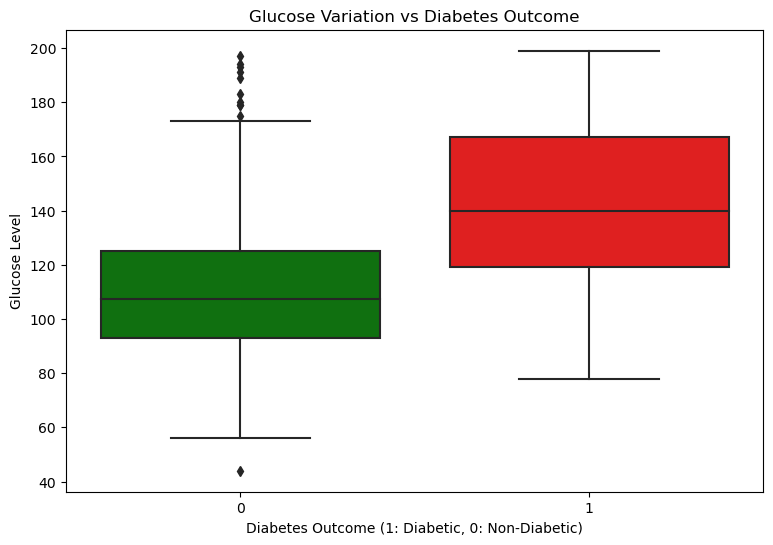

In [421]:
plt.figure(figsize=(9, 6))
custom_palette = ["green", "red"]
sns.boxplot(x='Outcome', y='Glucose', data=data, palette=custom_palette)
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Glucose Level')
plt.title('Glucose Variation vs Diabetes Outcome')
plt.show()

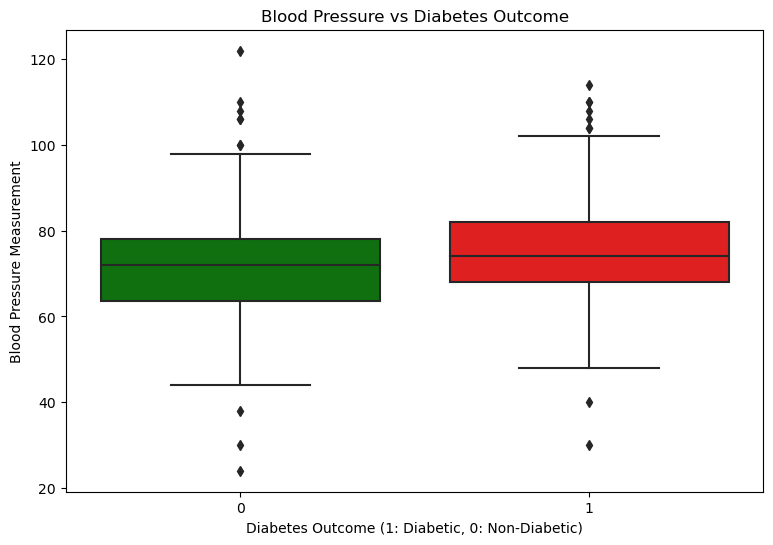

In [422]:
plt.figure(figsize=(9, 6))
custom_palette = ["green", "red"]
sns.boxplot(x='Outcome', y='BloodPressure', data=data, palette=custom_palette)
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Blood Pressure Measurement')
plt.title('Blood Pressure vs Diabetes Outcome')
plt.show()

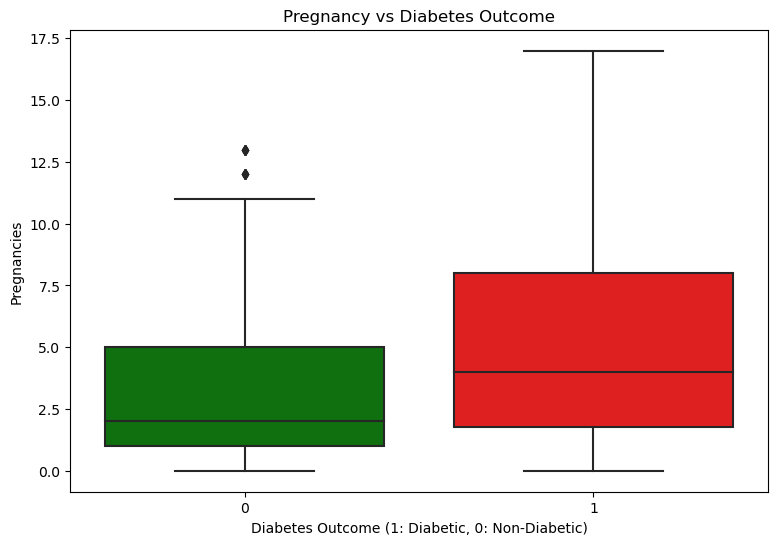

In [423]:
plt.figure(figsize=(9, 6))
custom_palette = ["green", "red"]
sns.boxplot(x='Outcome', y='Pregnancies', data=data, palette=custom_palette)
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Pregnancies')
plt.title('Pregnancy vs Diabetes Outcome')
plt.show()

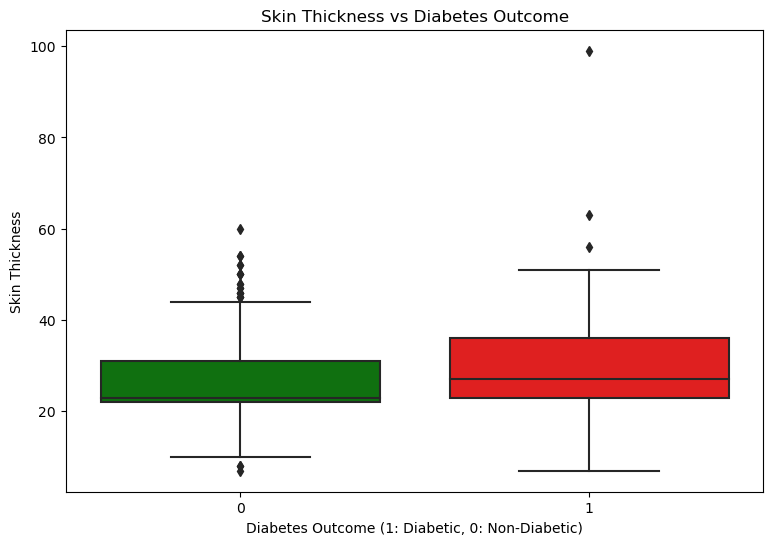

In [424]:
plt.figure(figsize=(9, 6))
custom_palette = ["green", "red"]
sns.boxplot(x='Outcome', y='SkinThickness', data=data, palette=custom_palette)
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Skin Thickness')
plt.title('Skin Thickness vs Diabetes Outcome')
plt.show()

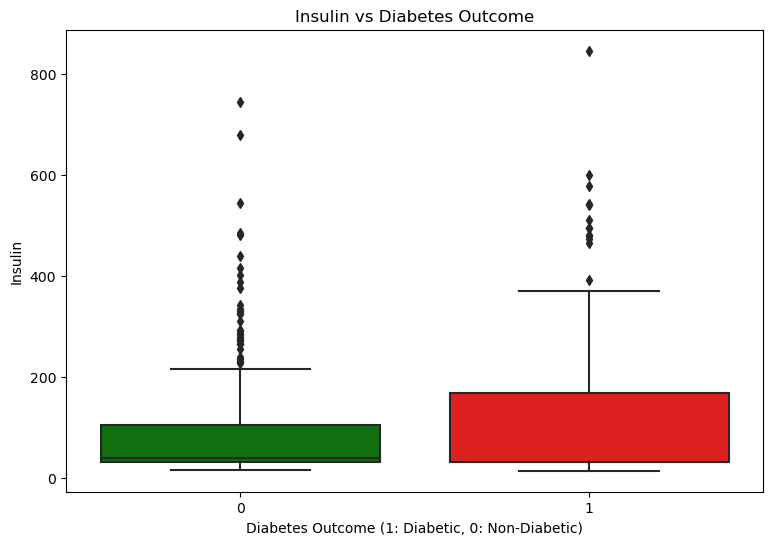

In [425]:
plt.figure(figsize=(9, 6))
custom_palette = ["green", "red"]
sns.boxplot(x='Outcome', y='Insulin', data=data, palette=custom_palette)
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Insulin')
plt.title('Insulin vs Diabetes Outcome')
plt.show()

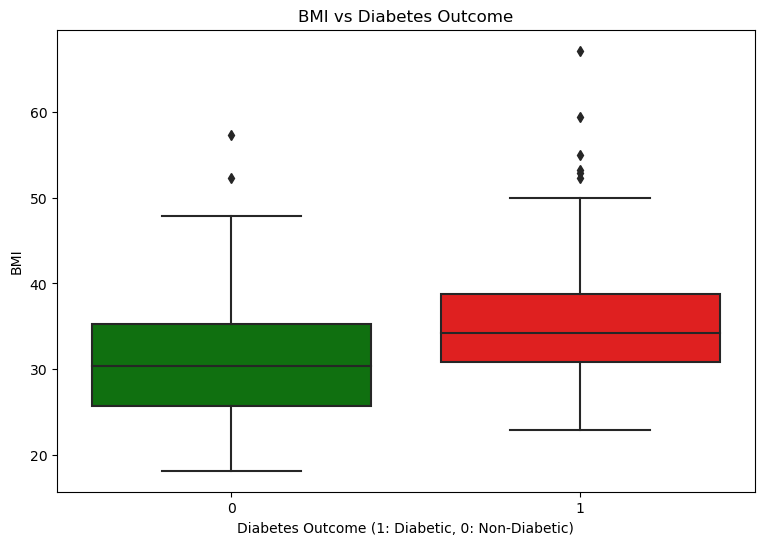

In [426]:
plt.figure(figsize=(9, 6))
custom_palette = ["green", "red"]
sns.boxplot(x='Outcome', y='BMI', data=data, palette=custom_palette)
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('BMI')
plt.title('BMI vs Diabetes Outcome')
plt.show()

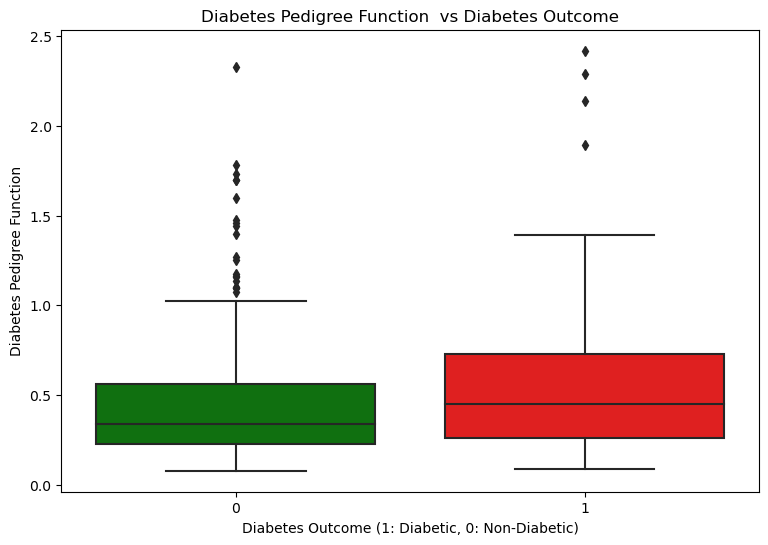

In [427]:
plt.figure(figsize=(9, 6))
custom_palette = ["green", "red"]
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=data, palette=custom_palette)
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Diabetes Pedigree Function')
plt.title('Diabetes Pedigree Function  vs Diabetes Outcome')
plt.show()

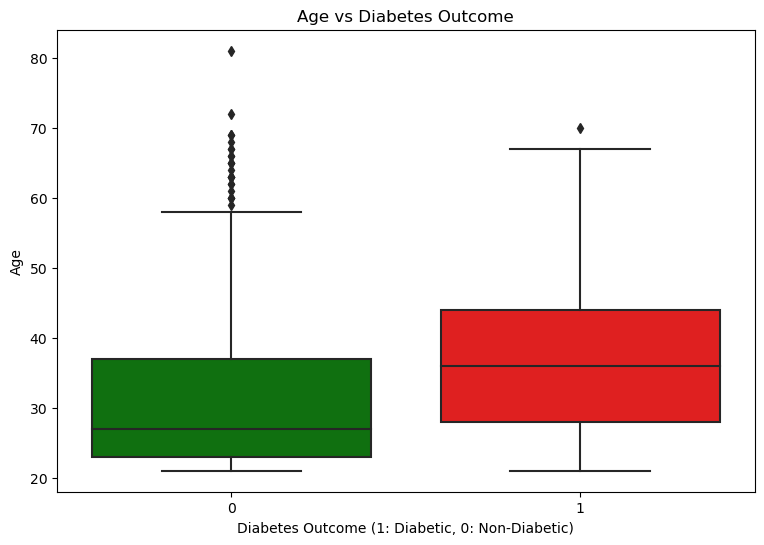

In [428]:
plt.figure(figsize=(9, 6))
custom_palette = ["green", "red"]
sns.boxplot(x='Outcome', y='Age', data=data, palette=custom_palette)
plt.xlabel('Diabetes Outcome (1: Diabetic, 0: Non-Diabetic)')
plt.ylabel('Age')
plt.title('Age vs Diabetes Outcome')
plt.show()

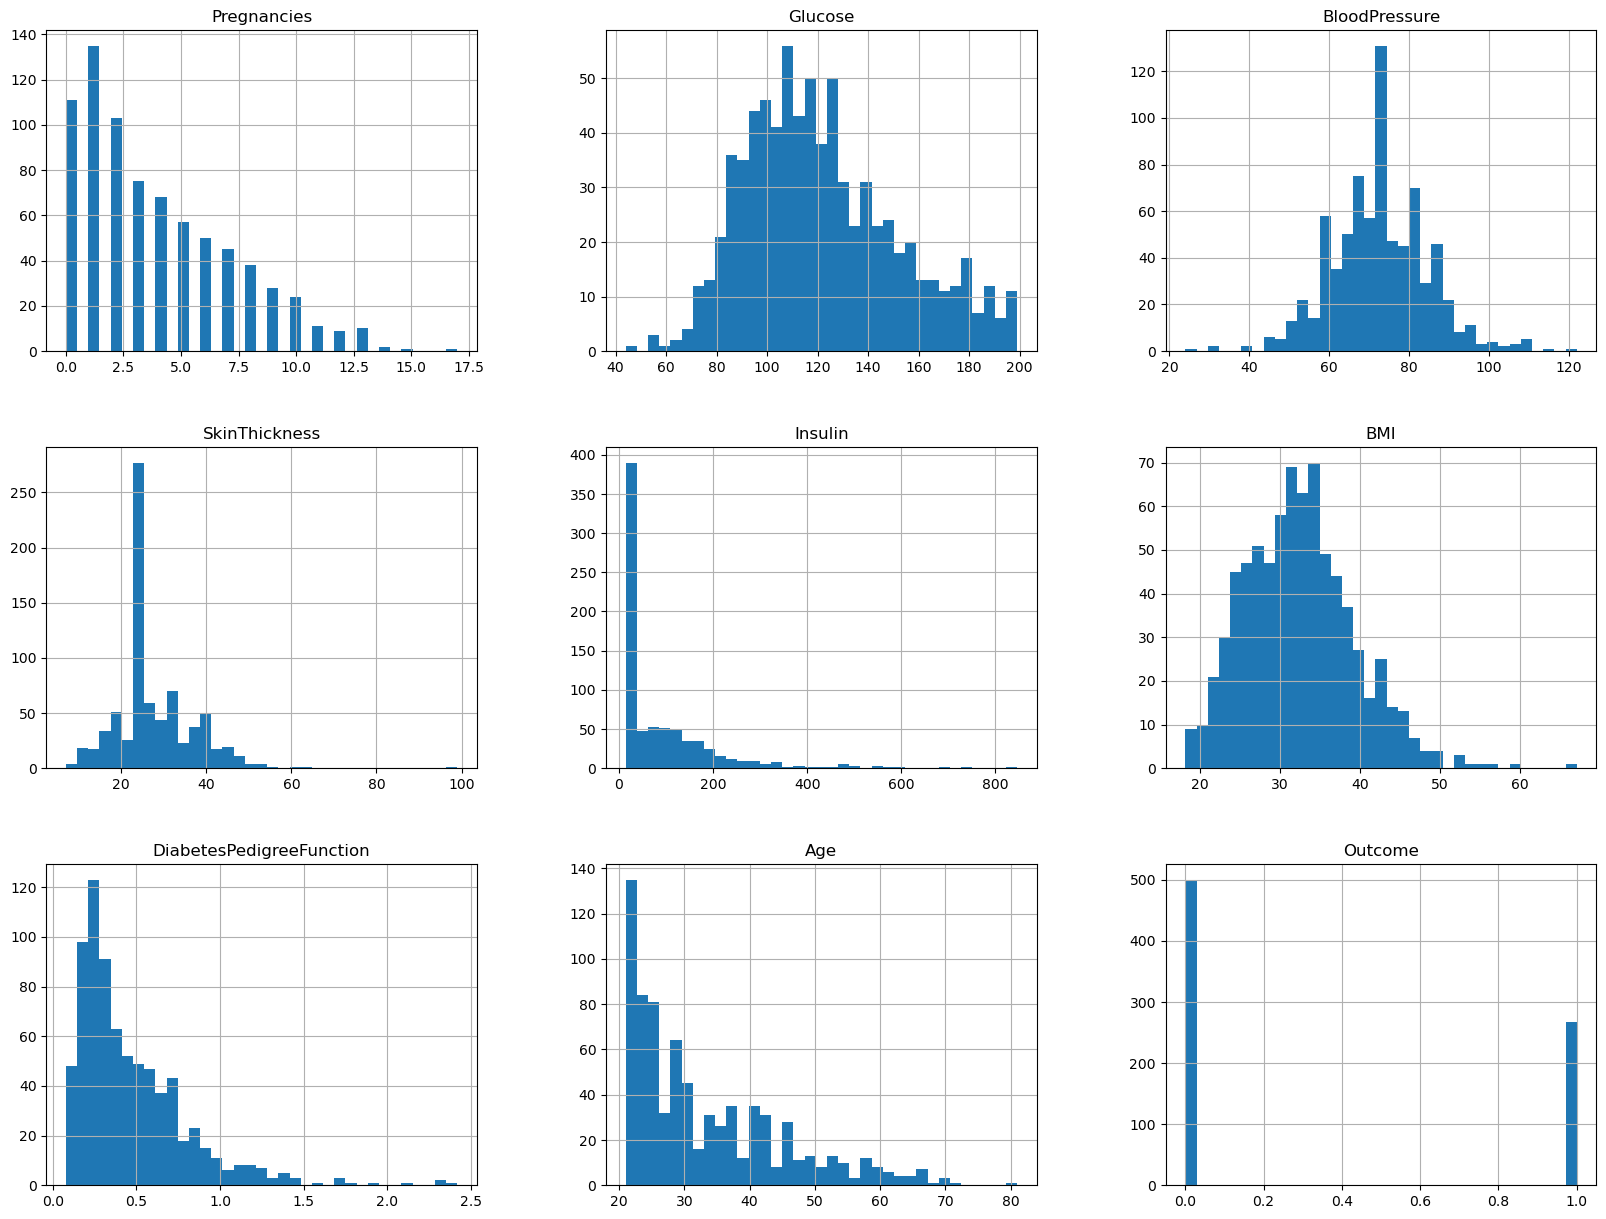

In [429]:
#Distribuation of data for each feature
data.hist(bins=35, figsize=(20,15));

Observations:

-  Age-Diabetes reveals that increasing the age has the impact on the positive diabetes, but this can not be generalized as there are other effectivie factors
- Plot PDF-Diabetes reveals that increasing PDF has the impact on the positive diabetes, but this can not be generalized as there are other effectivie factors
- From BMI-Diabetes, we see absoultely a big difference beetween diabetes and non diabetes. Even the minimum of the diabetes has bigger value that non diabetes persons.
- Insulin, glucose, blood pressure and pregnancy levels clearly have impact on diagnosis of the diabetes, but again should be investigated the effect of other factors.
- SkinThickness also seems has an impact on diabetes, but it needs more investigations for this case. 

# Correlation between features

In [430]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70,27.0,30.5,36.8,0.340,27,0
765,5,121.0,72,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60,23.0,30.5,30.1,0.349,47,1


Correlation Matrix

In [431]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


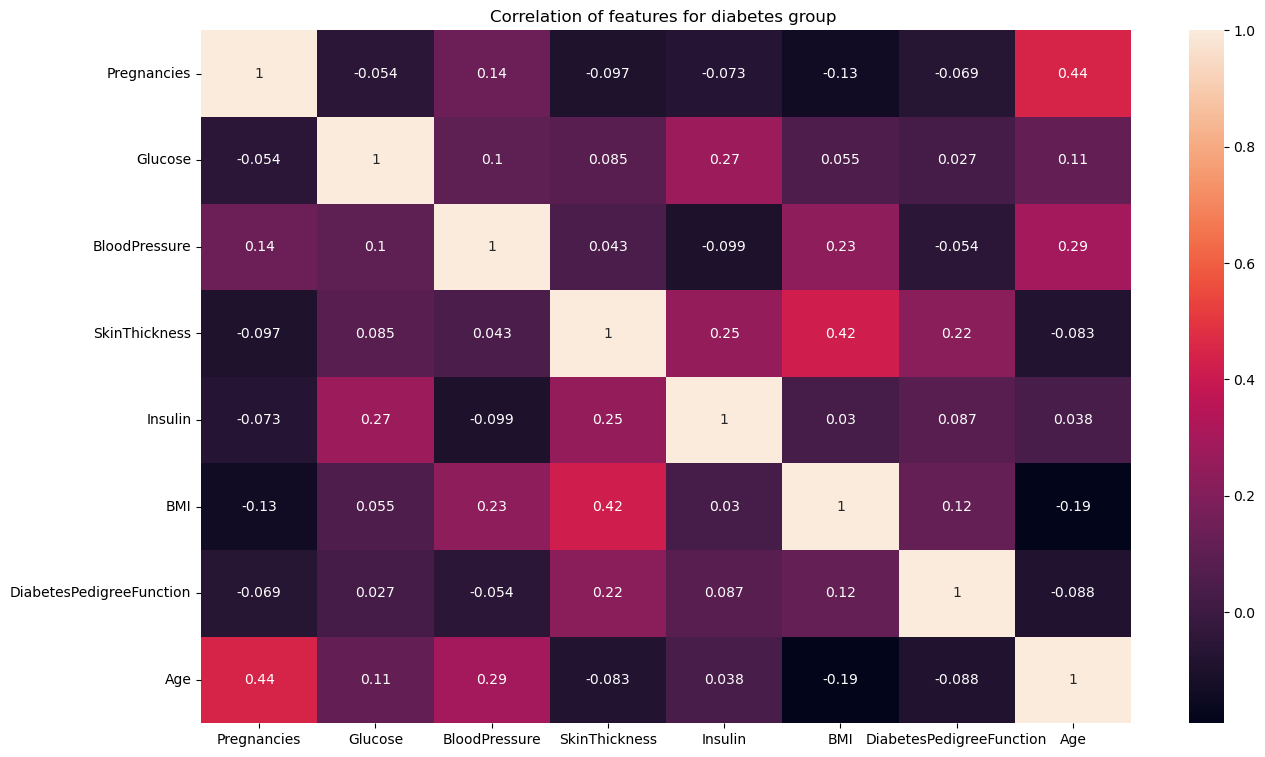

In [432]:
# Correlation heatmapof features for diabetes
plt.figure(figsize=(15, 9))
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
sns.heatmap(data[data['Outcome'] == 1][features].corr(), annot=True)
plt.title('Correlation of features for diabetes group ')
plt.show()

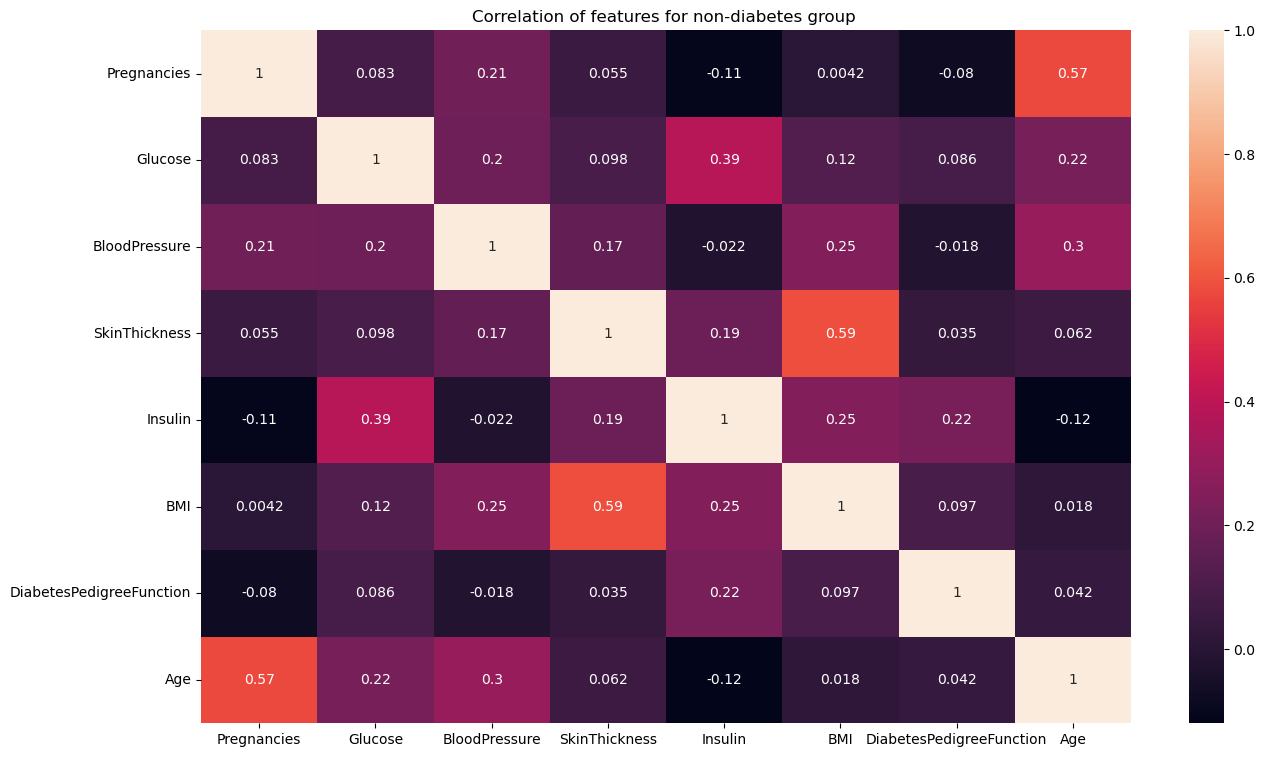

In [433]:
# Correlation heatmap of features for non diabetes 
plt.figure(figsize=(15, 9))
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
sns.heatmap(data[data['Outcome'] == 0][features].corr(), annot=True)
plt.title('Correlation of features for non-diabetes group ')
plt.show()

In [434]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')


In [435]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeIntervals
0,6,148.0,72,35.0,30.5,33.6,0.627,50,1,Group3
1,1,85.0,66,29.0,30.5,26.6,0.351,31,0,Group1
2,8,183.0,64,23.0,30.5,23.3,0.672,32,1,Group1
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0,Group1
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1,Group1


In [436]:
data= pd. get_dummies(data, columns=['AgeIntervals'], drop_first=True)

In [437]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeIntervals_Group2,AgeIntervals_Group3,AgeIntervals_Group4,AgeIntervals_Group5
0,6,148.0,72,35.0,30.5,33.6,0.627,50,1,0,1,0,0
1,1,85.0,66,29.0,30.5,26.6,0.351,31,0,0,0,0,0
2,8,183.0,64,23.0,30.5,23.3,0.672,32,1,0,0,0,0
3,1,89.0,66,23.0,94.0,28.1,0.167,21,0,0,0,0,0
4,0,137.0,40,35.0,168.0,43.1,2.288,33,1,0,0,0,0


# Dependent and independent variables

In [438]:
x = data.drop(['Outcome'], axis=1)
y = data['Outcome']
x.shape, y.shape

((768, 12), (768,))

In [439]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2, random_state = 56)

In [440]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [441]:
cols = train_x.columns
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'AgeIntervals_Group2',
       'AgeIntervals_Group3', 'AgeIntervals_Group4', 'AgeIntervals_Group5'],
      dtype='object')

In [442]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeIntervals_Group2,AgeIntervals_Group3,AgeIntervals_Group4,AgeIntervals_Group5
0,0.117647,0.363636,0.469388,0.489130,0.051683,0.456033,0.255764,0.066667,0.0,0.0,0.0,0.0
1,0.176471,0.772727,0.469388,0.119565,0.109375,0.274029,0.081127,0.116667,0.0,0.0,0.0,0.0
2,0.235294,0.584416,0.489796,0.173913,0.019832,0.114519,0.084970,0.650000,0.0,0.0,1.0,0.0
3,0.294118,0.928571,0.530612,0.217391,0.231971,0.519427,0.408198,0.533333,0.0,1.0,0.0,0.0
4,0.058824,0.623377,0.510204,0.206522,0.199519,0.120654,0.320239,0.033333,0.0,0.0,0.0,0.0


In [443]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeIntervals_Group2,AgeIntervals_Group3,AgeIntervals_Group4,AgeIntervals_Group5
0,0.294118,0.571429,0.571429,0.173913,0.019832,0.175869,0.046114,0.800000,0.0,0.0,1.0,0.0
1,0.352941,0.694805,0.387755,0.260870,0.127404,0.353783,0.262169,0.116667,0.0,0.0,0.0,0.0
2,0.176471,0.837662,0.591837,0.445652,0.542067,0.413088,0.879163,0.066667,0.0,0.0,0.0,0.0
3,0.000000,0.798701,0.489796,0.173913,0.019832,0.288344,0.324936,0.150000,0.0,0.0,0.0,0.0
4,0.411765,0.701299,0.653061,0.402174,0.019832,0.650307,0.110589,0.250000,1.0,0.0,0.0,0.0


# Building the model

In [444]:
#importing Logistic Regression and metric accuracy score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict
train_prob=logreg.predict_proba(train_x)

# Calculating accuracy-score
k = accuracy_score(train_predict, train_y)
print('Training accuracy_score', k )

# Predicting over the Test Set and accuracy-score
test_predict = logreg.predict(test_x)
test_prob=logreg.predict_proba(test_x)
k = accuracy_score(test_predict, test_y)
print('Test accuracy_score    ', k )



Training accuracy_score 0.755700325732899
Test accuracy_score     0.7987012987012987


In [445]:
train_prob

array([[0.75374599, 0.24625401],
       [0.46645191, 0.53354809],
       [0.86824145, 0.13175855],
       ...,
       [0.16375166, 0.83624834],
       [0.22723699, 0.77276301],
       [0.48479619, 0.51520381]])

# Evaluation Matrix

In [470]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(test_y, test_predict)
cf

array([[101,  13],
       [ 18,  22]], dtype=int64)

In [447]:
#Accuracy
logreg.score(test_x, test_y)

0.7987012987012987

In [473]:
#calculating f1 score
from sklearn.metrics import f1_score
F1=f1_score(test_y, test_predict)
F1   

0.5866666666666667

The model is working quite well as f1> 0.50.

In [475]:
#calculating the precision,recall,f1, support score
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
Precision,Recall,f1, Support =PRF_summary(test_y, test_predict)


In [459]:
from sklearn.metrics import classification_report
k=classification_report(test_y, test_predict)
print(k)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       114
           1       0.63      0.55      0.59        40

    accuracy                           0.80       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.79      0.80      0.79       154



In [461]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold=roc_curve(test_y, test_prob[:,1])

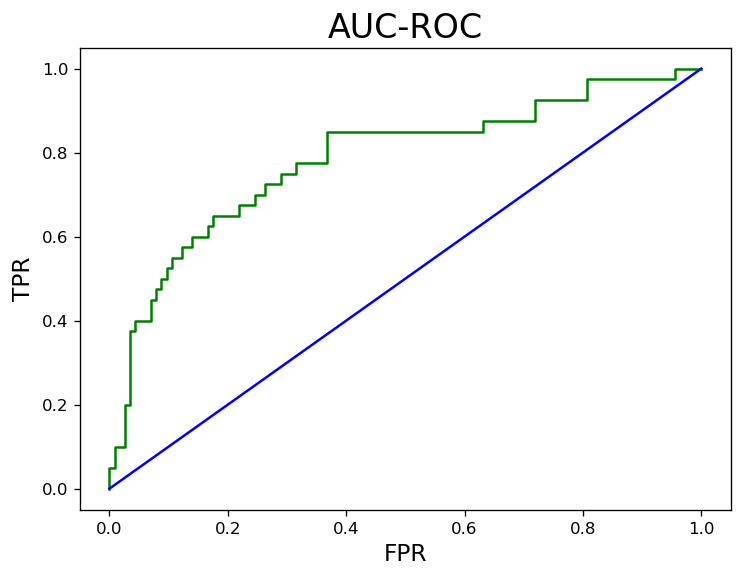

0.7848684210526314

In [464]:
plt.figure(figsize=(7,5), dpi=120)
plt.plot(fpr, tpr, color='green')
plt.plot([0,1], [0,1], label='baseline', color='blue')
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.title('AUC-ROC',fontsize=20)
plt.show()
roc_auc_score(test_y, test_prob[:,1])

# Coefficient Plot

In [465]:
c = logreg.coef_.reshape(-1)
x = x.columns

coeff_plot= pd. DataFrame( {
                            'coefficients': c,
                            'variables': x
                            })

#sorting values
coeff_plot=coeff_plot.sort_values(by='coefficients')
coeff_plot.head()

,coefficients,variables
10,-0.510190,AgeIntervals_Group4
2,-0.037956,BloodPressure
11,-0.025609,AgeIntervals_Group5
7,-0.015124,Age
4,-0.000790,Insulin


Text(0.5, 1.0, 'Coefficient Plot')

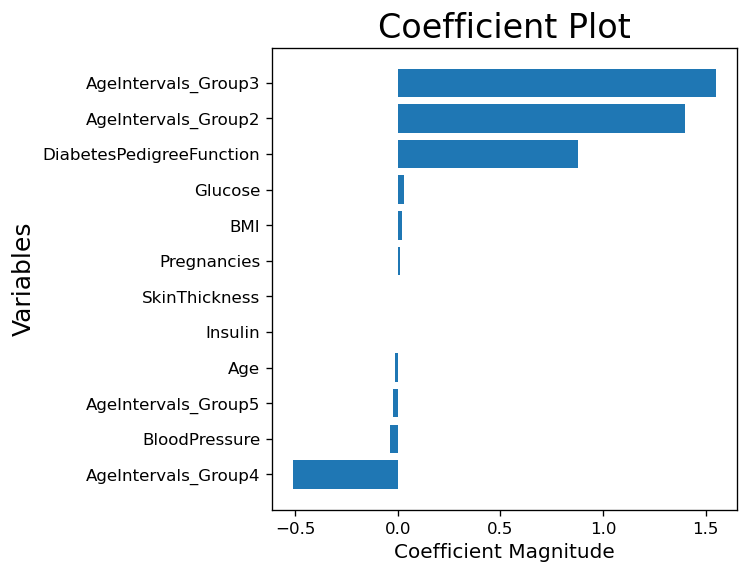

In [468]:
plt.figure(figsize=(5,5,), dpi=120)
plt.barh(coeff_plot['variables'], coeff_plot['coefficients'])
plt.xlabel('Coefficient Magnitude', fontsize=12)
plt.ylabel('Variables', fontsize=15)
plt.title('Coefficient Plot', fontsize=20)